# This work tries to classifying sentiment from financial news using TFIDF vectorizer

In [6]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [41]:
df = pd.read_csv("/content/drive/MyDrive/Review/all-data.csv",encoding= 'latin-1', names=["sentiment", "text"] )

In [42]:
print(df.head(15))


   sentiment                                               text
0    neutral  According to Gran , the company has no plans t...
1    neutral  Technopolis plans to develop in stages an area...
2   negative  The international electronic industry company ...
3   positive  With the new production plant the company woul...
4   positive  According to the company 's updated strategy f...
5   positive  FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
6   positive  For the last quarter of 2010 , Componenta 's n...
7   positive  In the third quarter of 2010 , net sales incre...
8   positive  Operating profit rose to EUR 13.1 mn from EUR ...
9   positive  Operating profit totalled EUR 21.1 mn , up fro...
10  positive  TeliaSonera TLSN said the offer is in line wit...
11  positive  STORA ENSO , NORSKE SKOG , M-REAL , UPM-KYMMEN...
12  positive  A purchase agreement for 7,200 tons of gasolin...
13  positive  Finnish Talentum reports its operating profit ...
14  positive  Clothing retail chain Sepp

In [43]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  4846 non-null   object
 1   text       4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB
None


In [44]:
print(df['text'].nunique())

4838


# 🔹 Step 3: Data Preprocessing

Financial text may have numbers, company tickers, currency symbols.
Steps:

Lowercase text

Remove punctuation, special characters

Remove stopwords (like “the”, “is”, “in”)

Tokenize and lemmatize words

In [24]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)   # remove punctuation
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return " ".join(tokens)

df['clean_text'] = df['text'].apply(clean_text)
print(df[['text','clean_text']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


                                                text  \
0  According to Gran , the company has no plans t...   
1  Technopolis plans to develop in stages an area...   
2  The international electronic industry company ...   
3  With the new production plant the company woul...   
4  According to the company 's updated strategy f...   

                                          clean_text  
0  according gran company plan move production ru...  
1  technopolis plan develop stage area less 10000...  
2  international electronic industry company elco...  
3  new production plant company would increase ca...  
4  according company updated strategy year 200920...  


# 🔹 Step 4: Feature Extraction (Text to Numbers)

We need to convert text into numerical features for ML models.
Two common approaches:

TF-IDF

Word Embeddings (Word2Vec, GloVe, BERT)

Here we start with TF-IDF:

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])
y = df['sentiment']


# 🔹 Step 5: Train-Test Split

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 🔹 Step 6: Model Training

Let’s try Logistic Regression first (works well for text classification).

In [27]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

# 🔹 Step 7: Model Evaluation

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

    negative       0.80      0.44      0.56       110
     neutral       0.73      0.95      0.82       571
    positive       0.79      0.44      0.56       289

    accuracy                           0.74       970
   macro avg       0.77      0.61      0.65       970
weighted avg       0.75      0.74      0.72       970

[[ 48  52  10]
 [  3 544  24]
 [  9 153 127]]


In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


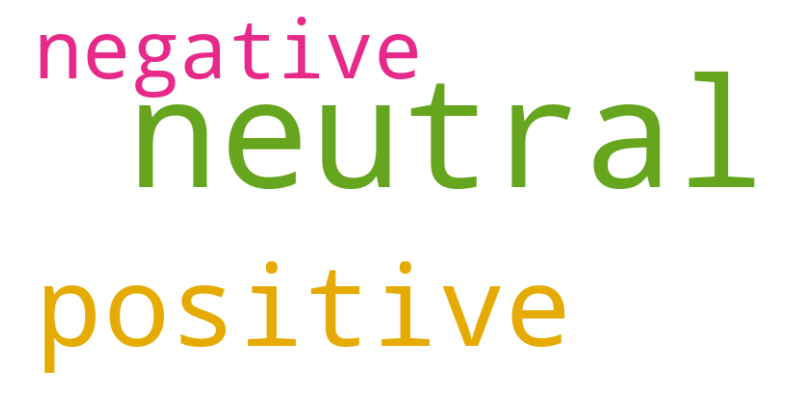

In [33]:
text = " ".join(df['sentiment'].astype(str))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white",
                      colormap="Dark2", collocations=False).generate(text)

# Display
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()